In [1]:
import pandas as pd
import numpy as np
import string
import re

In [2]:
data=pd.read_csv('Language Detection.csv')
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
def remove(text):
    for i in string.punctuation:
        text=text.replace(i,'')
    text=text.lower()
    return(text)
        

In [5]:
data['Text']=data['Text'].apply(remove)

In [6]:
from sklearn.model_selection import train_test_split

C:\Users\Anjal\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
x=data['Text']
y=data['Language']

In [8]:
y.head()

0    English
1    English
2    English
3    English
4    English
Name: Language, dtype: object

In [9]:
x.head()

0     nature in the broadest sense is the natural p...
1    nature can refer to the phenomena of the physi...
2    the study of nature is a large if not the only...
3    although humans are part of nature human activ...
4    1 the word nature is borrowed from the old fre...
Name: Text, dtype: object

In [10]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vd = TfidfVectorizer(ngram_range=(1, 2), analyzer='char')

In [12]:
# Define the pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [13]:
pipe=Pipeline([('vd',vd),('classifier',LogisticRegression())])

In [14]:
pipe


Pipeline(steps=[('vd', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('classifier', LogisticRegression())])

In [15]:
model = pipe.fit(x_train, y_train)


In [16]:
pred=model.predict(x_test)

In [17]:
from sklearn import metrics
metrics.accuracy_score(y_test,pred)

0.9782398452611218

In [18]:
cm=metrics.confusion_matrix(y_test,pred)

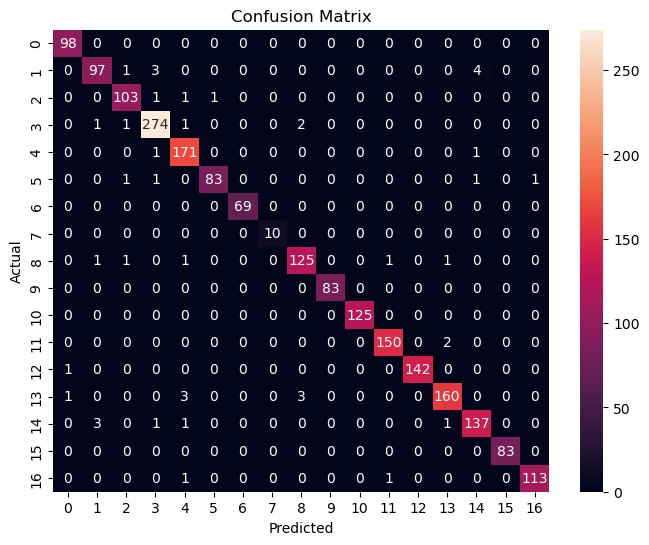

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
model.predict(['Le marché'])

array(['French'], dtype=object)

In [37]:
import pickle
lang_web=open('model.pckl','wb')
pickle.dump(model,lang_web)
lang_web.close()

In [34]:
import os

In [36]:
os.listdir()

['.bash_history',
 '.conda',
 '.condarc',
 '.continuum',
 '.gitconfig',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.keras',
 '.lesshst',
 '.matplotlib',
 '.spyder-py3',
 '.vscode',
 'accord_sedan.csv',
 'anaconda3',
 'AppData',
 'Application Data',
 'Billionaires Statistics Dataset.csv',
 'Billioniers_prj.ipynb',
 'cars.csv',
 'censusCrimeClean.csv',
 'churn_model.joblib',
 'City_lab2_pds.ipynb',
 'City_Pds_2.ipynb',
 'Contacts',
 'Cookies',
 'credit_test.csv',
 'credit_train.csv',
 'dev-v2.0.csv',
 'dev-v2.0.json',
 'diabetes.csv',
 'Documents',
 'Downloads',
 'fake news detection.ipynb',
 'Favorites',
 'heart.csv',
 'IBA_IOAPDATA',
 'income.csv',
 'IntelGraphicsProfiles',
 'Jedi',
 'keras_index.ipynb',
 'kmeans.ipynb',
 'Language Detection.csv',
 'language_detection.ipynb',
 'Links',
 'Loan payments data.csv',
 'Local Settings',
 'london-borough-profilesV2.xlsx',
 'Microsoft',
 'ML.index.ipynb',
 'model.pkl',
 'Music',
 'My Documents',
 'naive bayes.ipynb',
 'NCH 